# Question 1: Which factor influences the choice of a customer to book a location?  

### Strategy: 
The column **"number_of_bookings"** created from the calendar database, accounts for the number of days in the future year (2016) a property has been booked already. I will investigate the correlation between a property availability with the host characteristics, the location, the ratings, and the price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
seattle_listings = pd.read_csv('Seattle/seattle_listings_preprocessed.csv')
seattle_listings_encoded = pd.read_csv('Seattle/seattle_listings_preprocessed_encoded.csv')

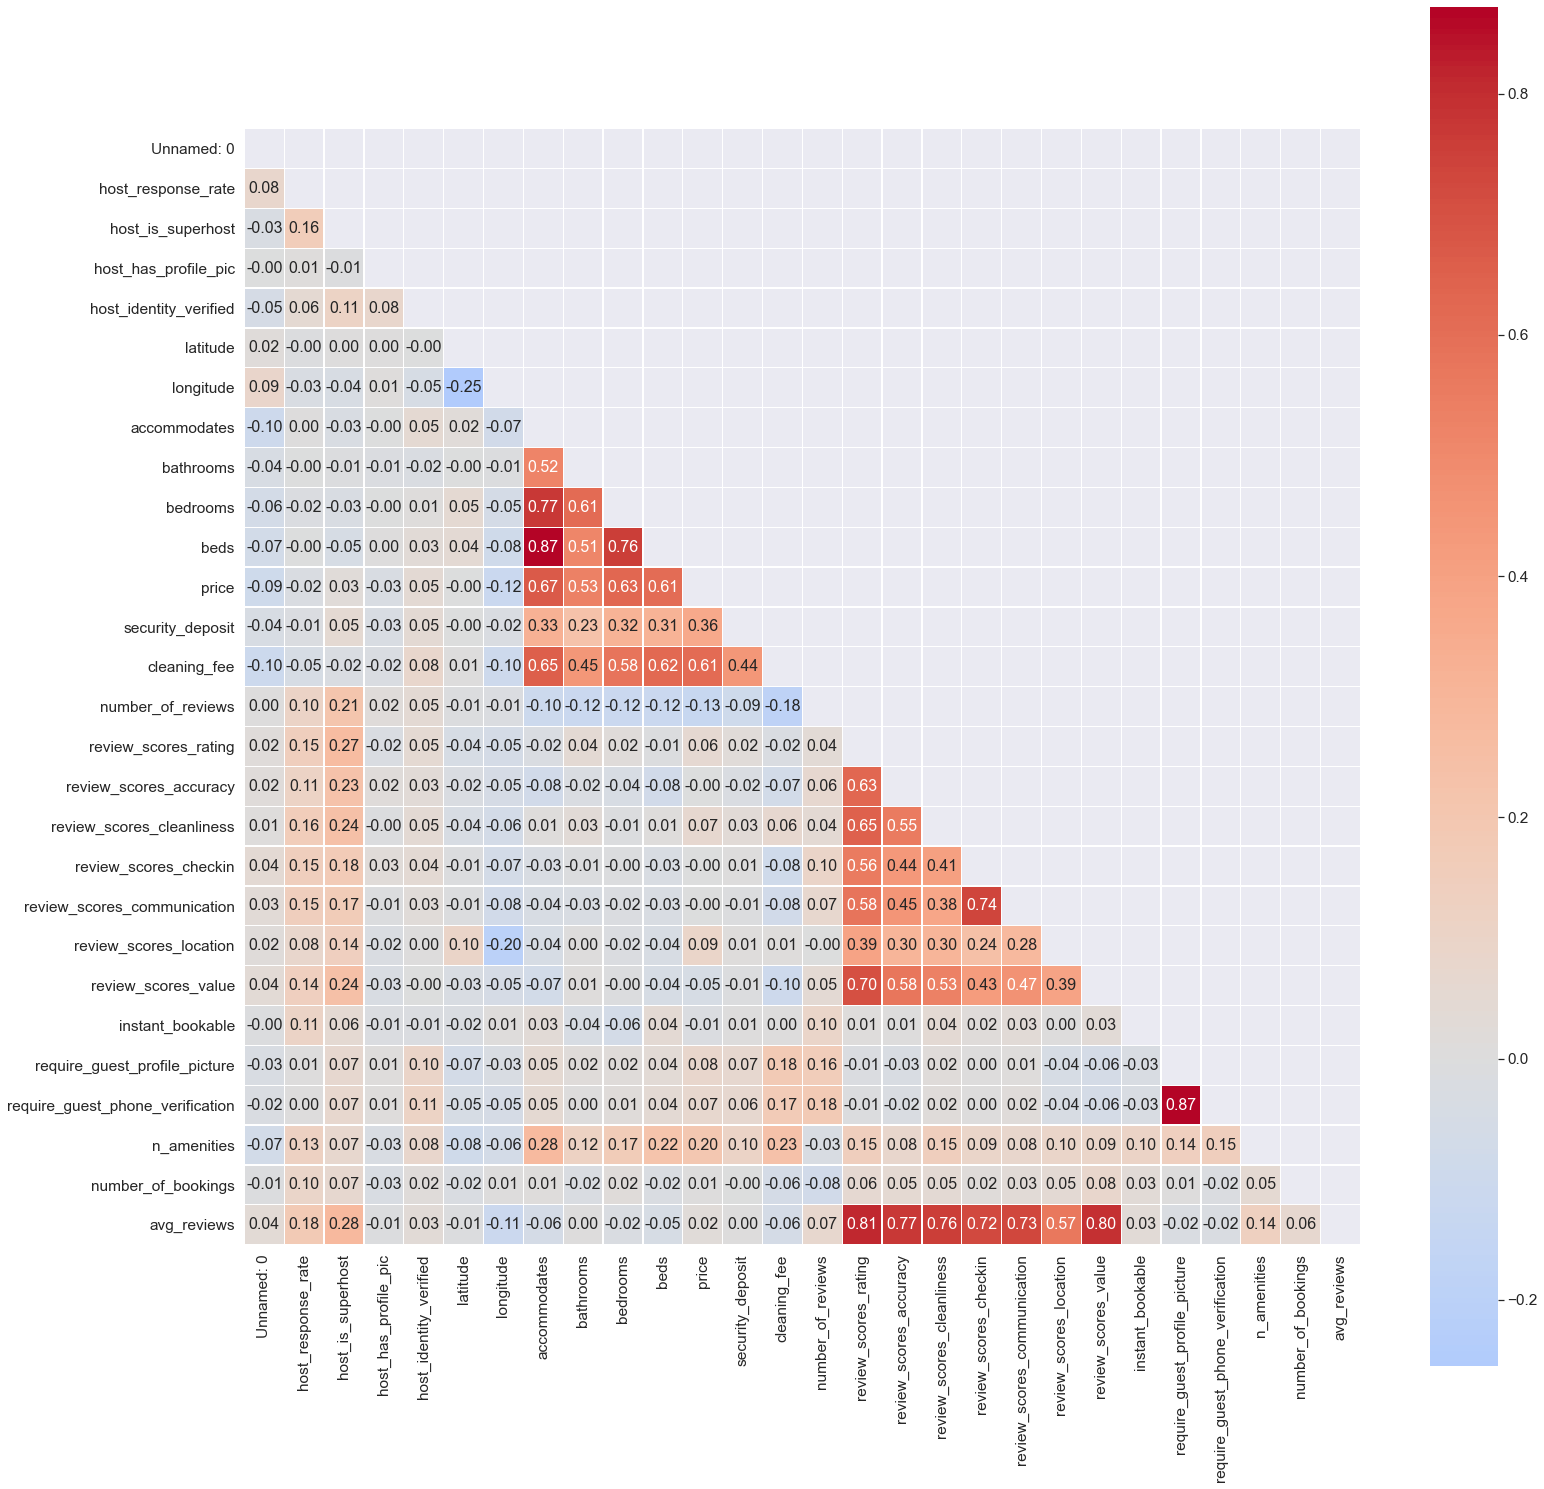

In [3]:
# We start the data analysis by looking at the correlations between columns

corr = seattle_listings.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))

fig = plt.figure(figsize= (25,25))
sns.set(font_scale=1.4)
sns.heatmap(corr, 
            annot=True, 
            mask = matrix, 
            center=0, 
            cmap="coolwarm", 
            linewidths=.3, 
            square=True,
            fmt= '.2f', 
            annot_kws={"size": 16});

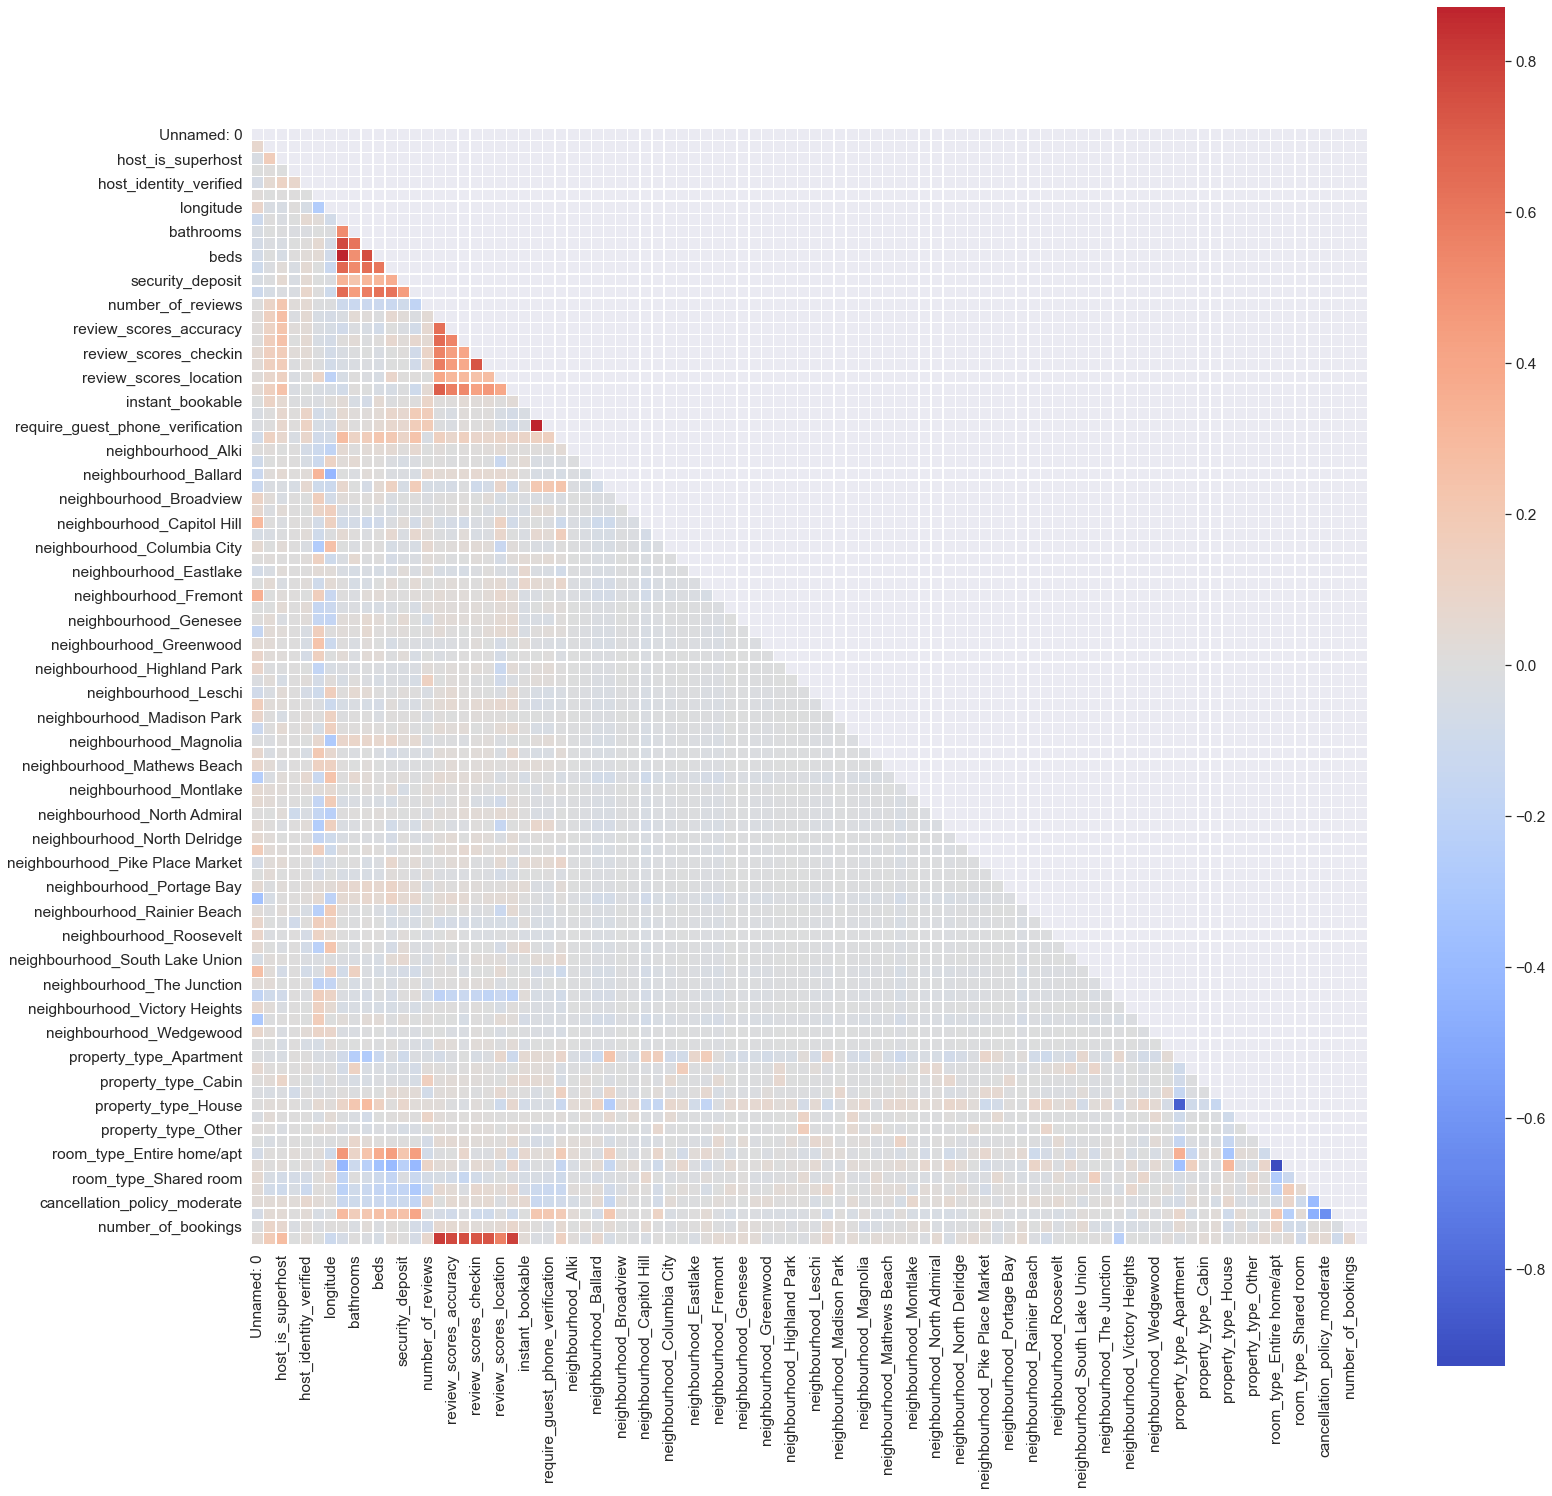

In [4]:
corr = seattle_listings_encoded.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))

fig = plt.figure(figsize= (25,25))
sns.heatmap(corr, 
            mask = matrix, 
            center=0, 
            cmap="coolwarm", 
            linewidths=.3, 
            square=True,
            fmt= '.2f', 
            annot_kws={"size": 16});

Because there are so many features, the most obvious correlations are between very correlated columns, like the ratings with each other, longitude and latitude, the house or apartment number of rooms, bathrooms and beds. A good correlation exist between the fees (price, security deposit, cleaning fee) and the house offered spaces.  


We now going to understand which factor influences the number of bookings. This feature represents the number of days in the future year (2016 in this case) already booked for each listing. It is not known when the survey was taken, likely at the end of 2015.

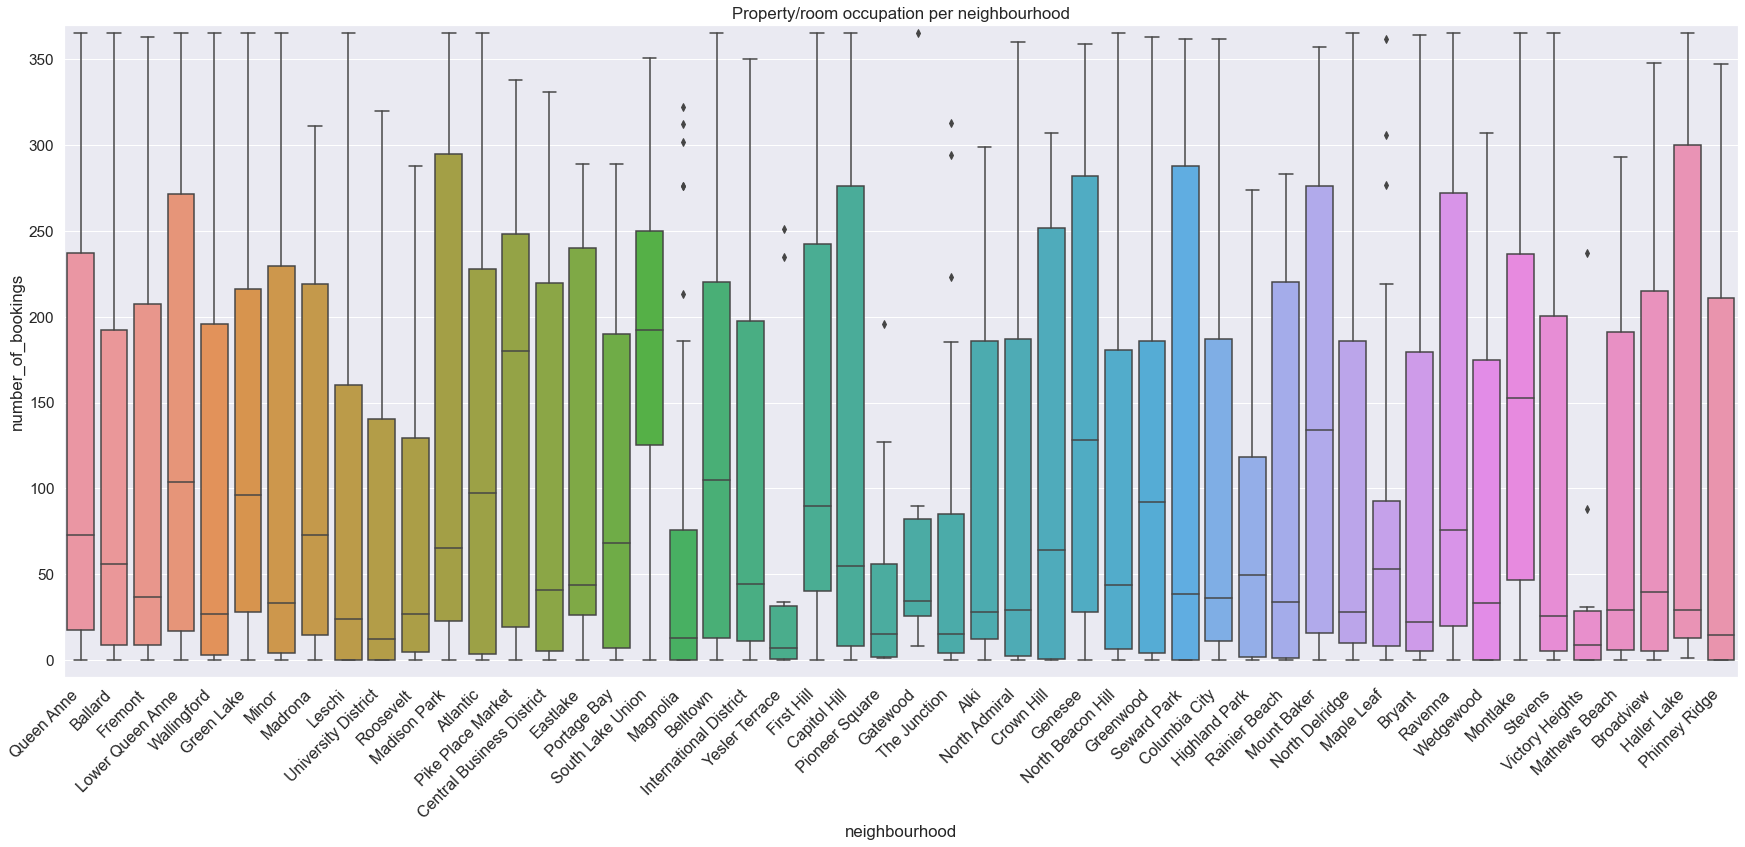

In [5]:
plt.figure(figsize=(30,12))
plt.title("Property/room occupation per neighbourhood")

sns.boxplot(data=seattle_listings, x='neighbourhood', y='number_of_bookings')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([-10,370])
plt.savefig('Property-room_occupation_neighbourhood.png', bbox_inches='tight');
plt.show()

The box plot above shows that there is a correlation between the neighborhood  and the number of bookings. The neighborhoods with the highest bookings median are Pike Place Market, South Lake Union, Belltown, Genesee, and Mount Baker. Some other neighborhoods are, on the other hand, not considered by possible guests: Magnolia, Yester Terrace, Pioneer Square, Gatewood, The Junction, Maple Leaf, and Victory Heights.

In [6]:
import plotly.express as px
fig = px.scatter_mapbox(seattle_listings, 
                        lat="latitude", 
                        lon="longitude", 
                        color='number_of_bookings', 
                        size="number_of_bookings",
                        zoom=3, 
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=10,
                        mapbox_style='open-street-map')

fig.update_layout(autosize=False,
                    width=1000,
                    height=1200)
fig.show()

The number of bookings on Seattle map. The circles size is proportional to the number of bookings. The busiest part of Seattle is focused on the central neighborhoods, close to the bay.

What about the **amenities** offered in the property?

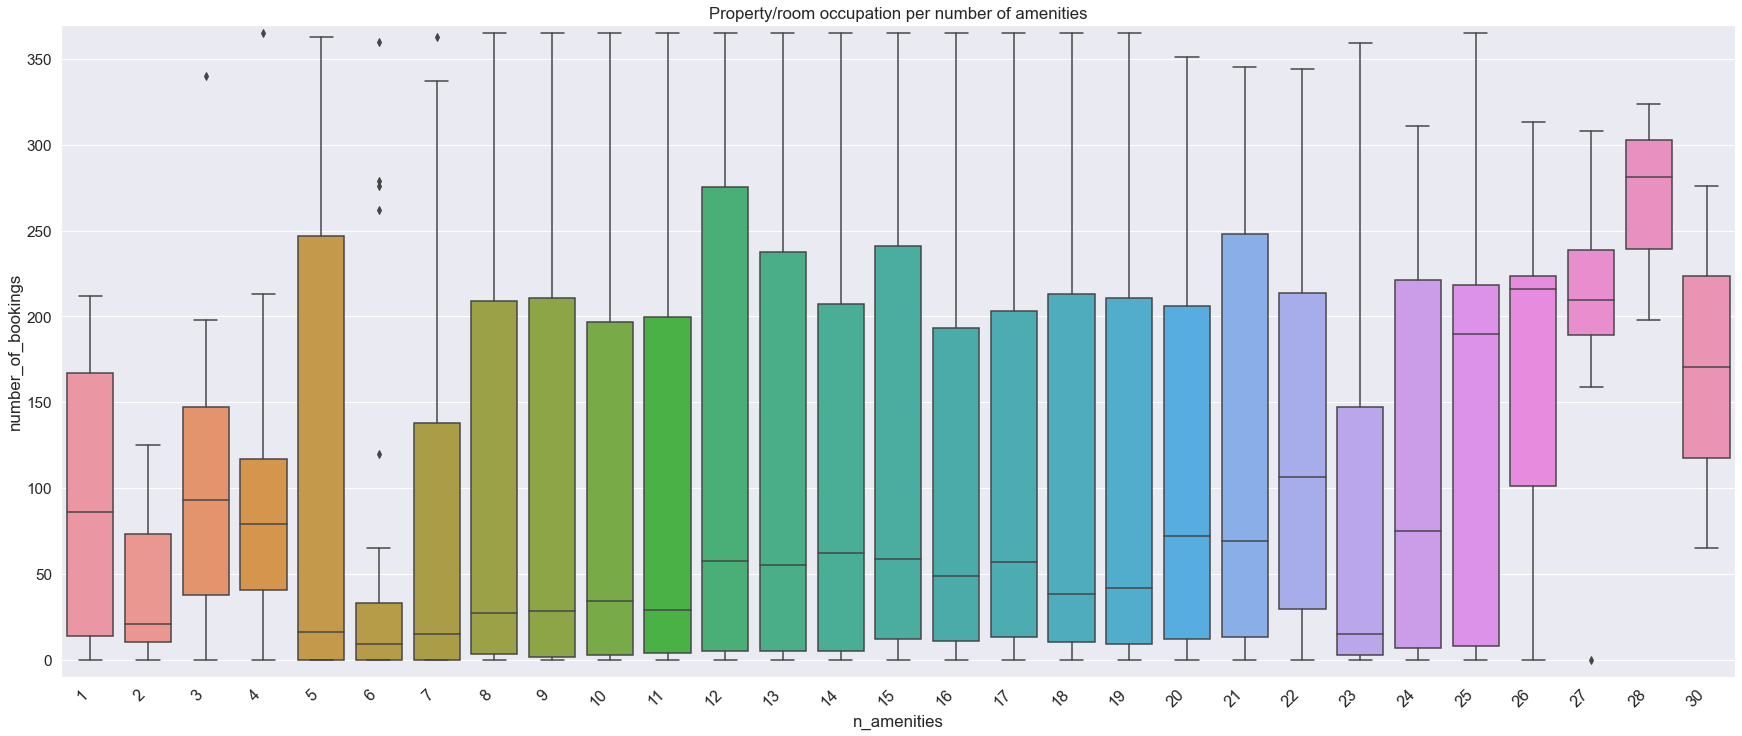

In [7]:
plt.figure(figsize=(30,12))
plt.title("Property/room occupation per number of amenities")

sns.boxplot(data=seattle_listings, x='n_amenities', y='number_of_bookings')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
plt.savefig('Property-room_occupation_amenities.png', bbox_inches='tight');
plt.ylim([-10,370])
plt.show();

The distribution is quite flat, unless the amenities offered are very low or very high.

<ipython-input-8-04047d086d24>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-8-04047d086d24>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-8-04047d086d24>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-8-04047d086d24>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-8-04047d086d24>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



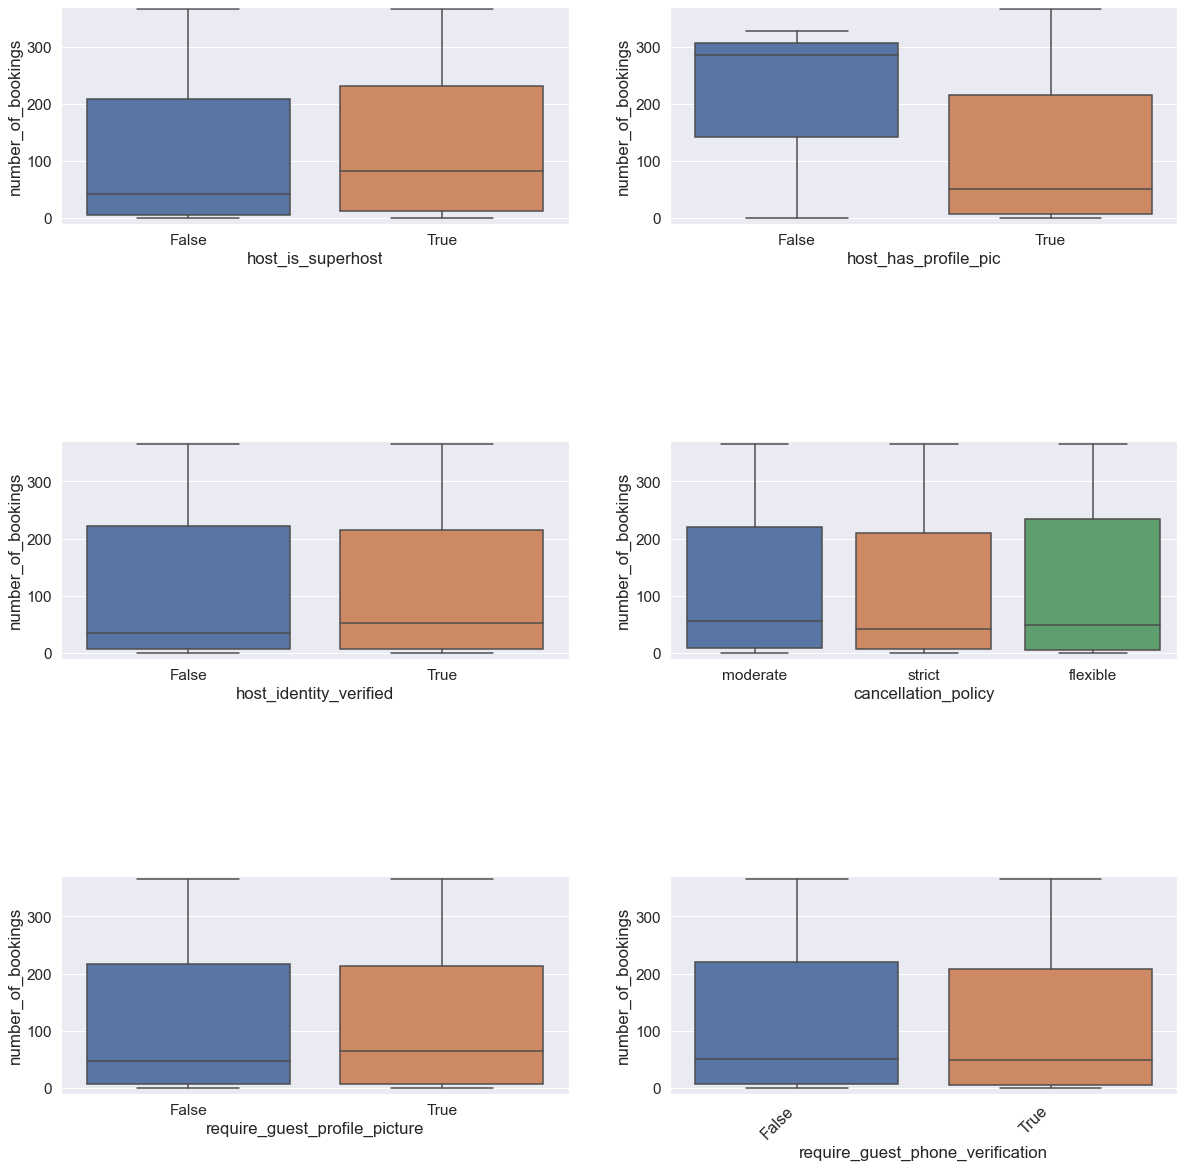

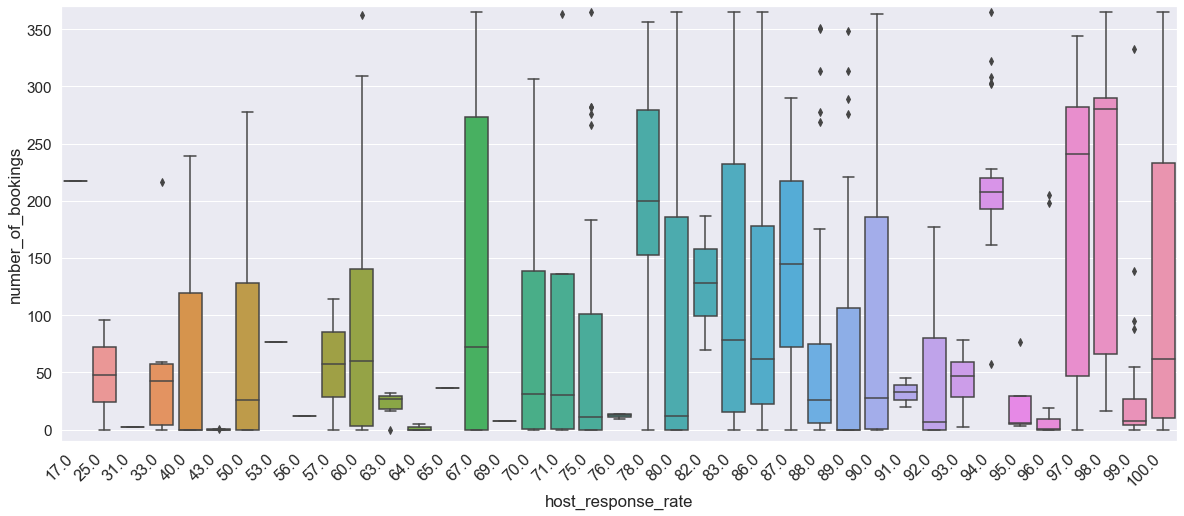

In [8]:
def feature_vs_host(dataset, reference_c, y_min, y_max):
    
    '''
    INPUT
        dataset: The dataset with the data to be plot
        
    OUTPUT
        Boxplots showing the relation betwenn the host characteristincs, and a property booking rate.
    '''
    selected_col = ['host_is_superhost',     
                    'host_has_profile_pic',
                    'host_identity_verified', 
                    'cancellation_policy',             
                    'require_guest_profile_picture',   
                    'require_guest_phone_verification']

    fig, axs = plt.subplots(3, 2, figsize=(20, 20))
    fig.subplots_adjust(hspace =1 , wspace=.2)
    axs = axs.ravel()

    for i in range(6):
        sns.boxplot(data=dataset, x=selected_col[i], y=reference_c, ax=axs[i])
        axs[i].set_ylim(y_min, y_max)
        axs[i] = plt.gca()
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right', fontsize=16);
    
    plt.savefig('Property-room_occupation_host_general.png', bbox_inches='tight');
    
    #----------------------------------------------------------------------#
    plt.figure(figsize=(20,8))
    
    sns.boxplot(data=dataset, x='host_response_rate', y=reference_c)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    plt.ylim(y_min, y_max)
    
    plt.savefig('Property-room_occupation_host_response_rate.png', bbox_inches='tight');
    
feature_vs_host(seattle_listings, 'number_of_bookings', -10, 370)  

The host features that can increase the number of bookings are 
- being a super host, 
- not having a profile picture, 
- having a verified ID, and 
- having a moderate cancellation policy.
- If a host has a response rate below 50%, then their property has less chances to be booked.

Another potentially important factor that can drive a customer book a property, is the **price** and the **additional fees** requested.

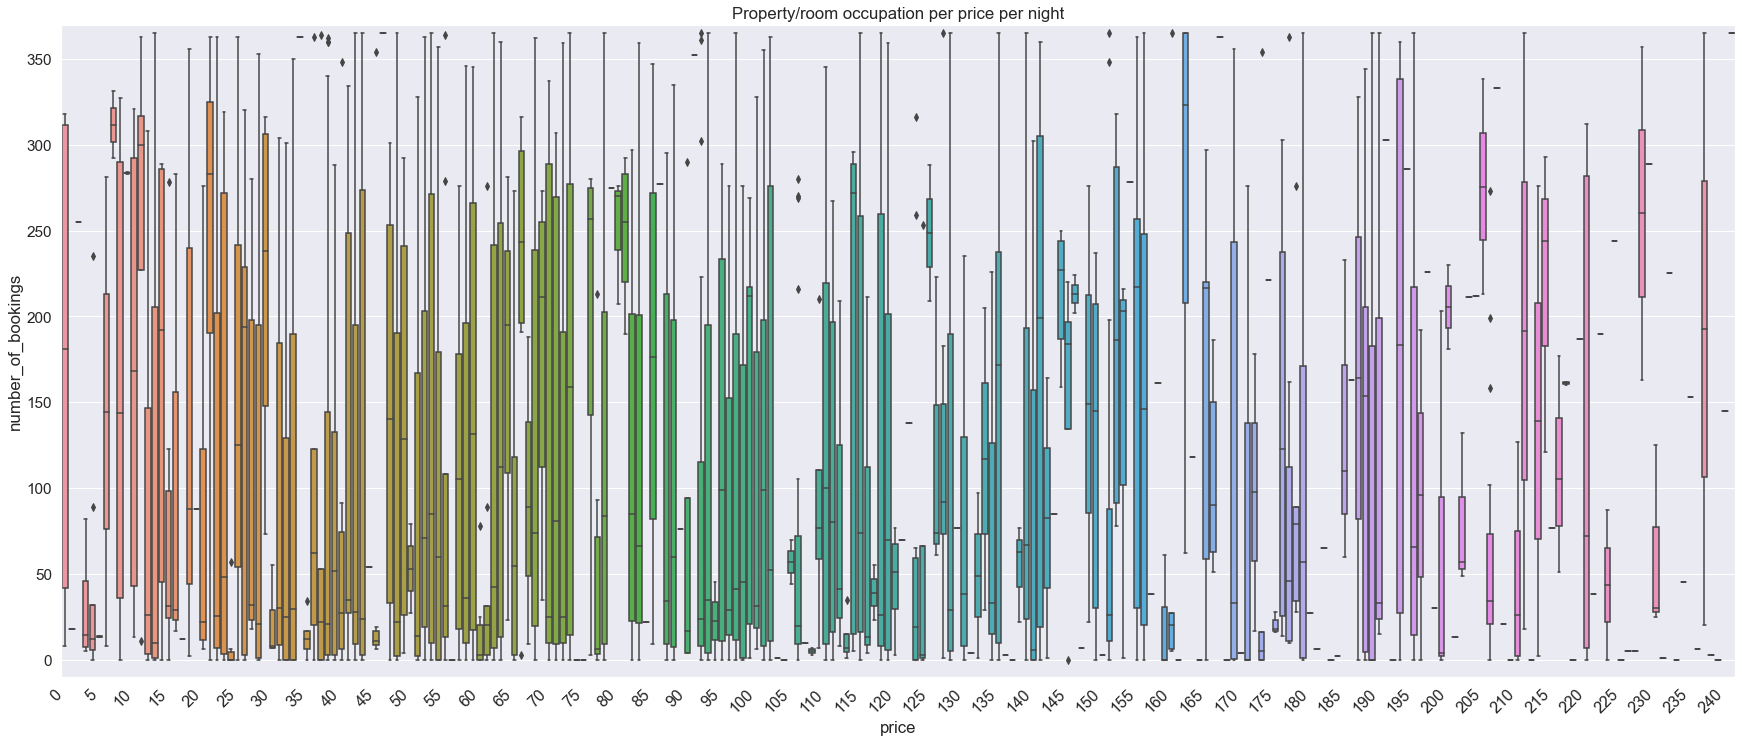

In [9]:
import matplotlib.ticker as ticker
plt.figure(figsize=(30,12))
plt.title("Property/room occupation per price per night")

sns.boxplot(data=seattle_listings, x='price', y='number_of_bookings')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.savefig('Property-room_occupation_price.png', bbox_inches='tight');
plt.ylim([-10,370])
plt.show();

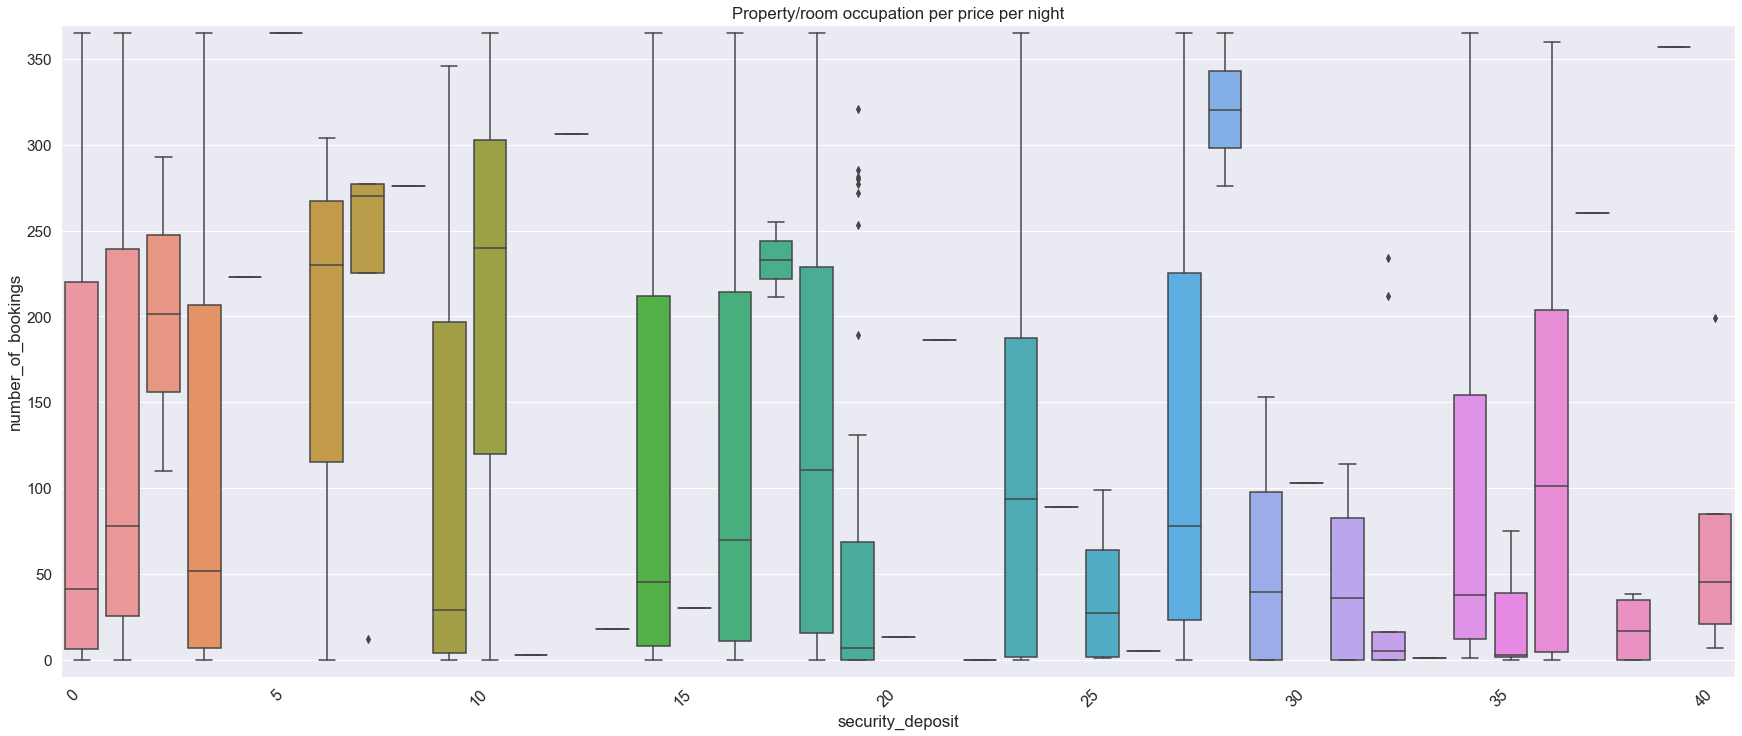

In [10]:
plt.figure(figsize=(30,12))
plt.title("Property/room occupation per price per night")

sns.boxplot(data=seattle_listings, x='security_deposit', y='number_of_bookings')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.savefig('Property-room_occupation_sec_dep.png', bbox_inches='tight');
plt.ylim([-10,370])
plt.show();

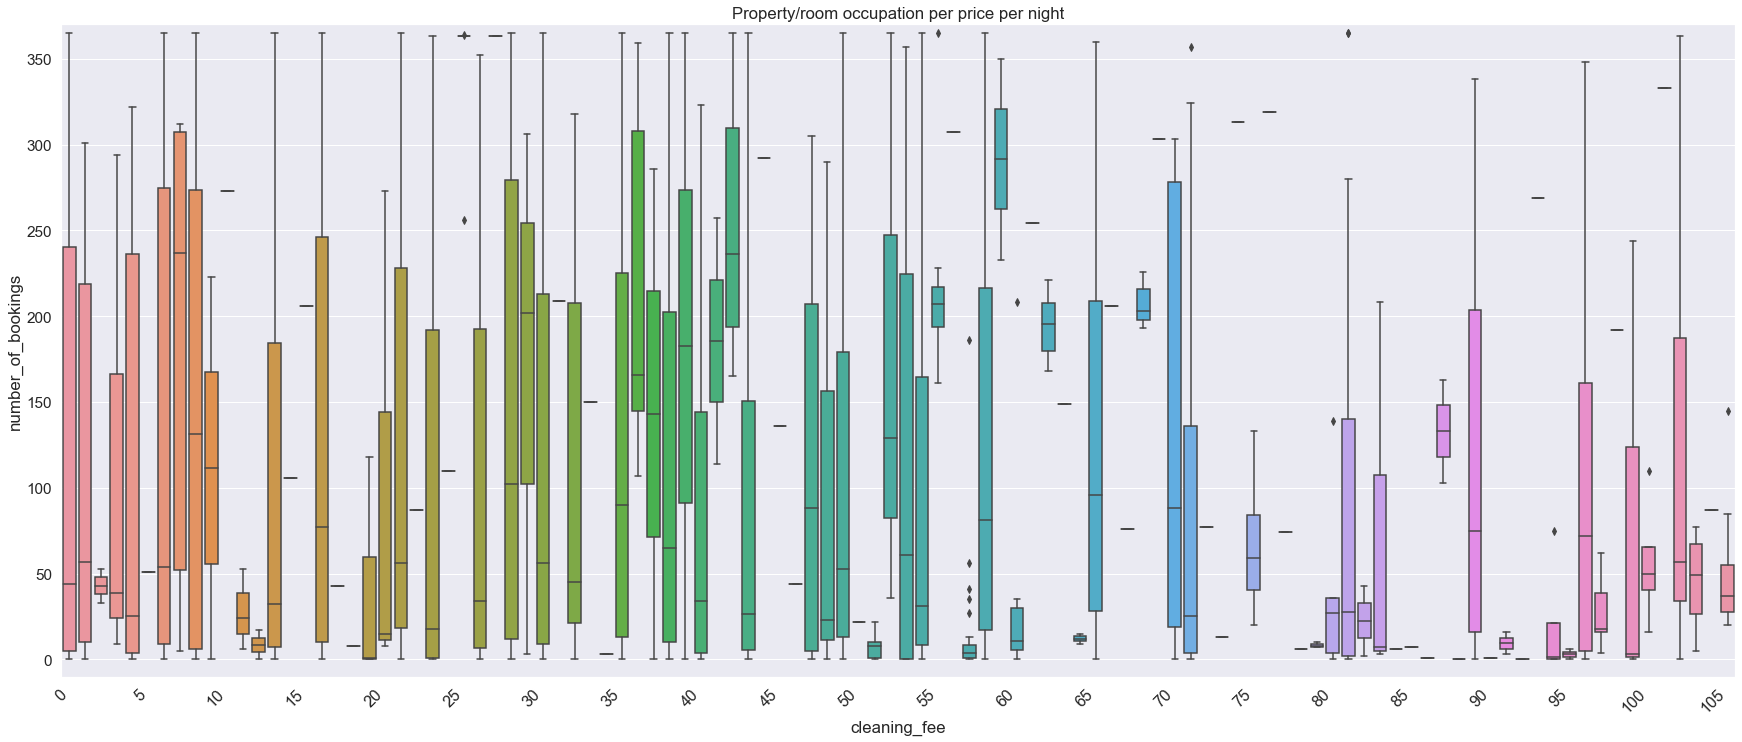

In [11]:
plt.figure(figsize=(30,12))
plt.title("Property/room occupation per price per night")

sns.boxplot(data=seattle_listings, x='cleaning_fee', y='number_of_bookings')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.savefig('Property-room_occupation_clean_fee.png', bbox_inches='tight');
plt.ylim([-10,370])
plt.show();

High cleaning fees and security deposit can influence the bookings rate more than the price. This likely means that the price itself is influenced by other factors, and that customers can chose to pay a higher price for a better offer or for a bigger and independent property. I will investigate this trend later, in question 3.

Finally, let's look how the reviews play a role in the decision of booking a place.

<ipython-input-12-6cd0dbb8f9e9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-12-6cd0dbb8f9e9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-12-6cd0dbb8f9e9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-12-6cd0dbb8f9e9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-12-6cd0dbb8f9e9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-12-6cd0dbb8f9e9>:32: UserWarning:

FixedFormatter should only be used together with FixedLocator



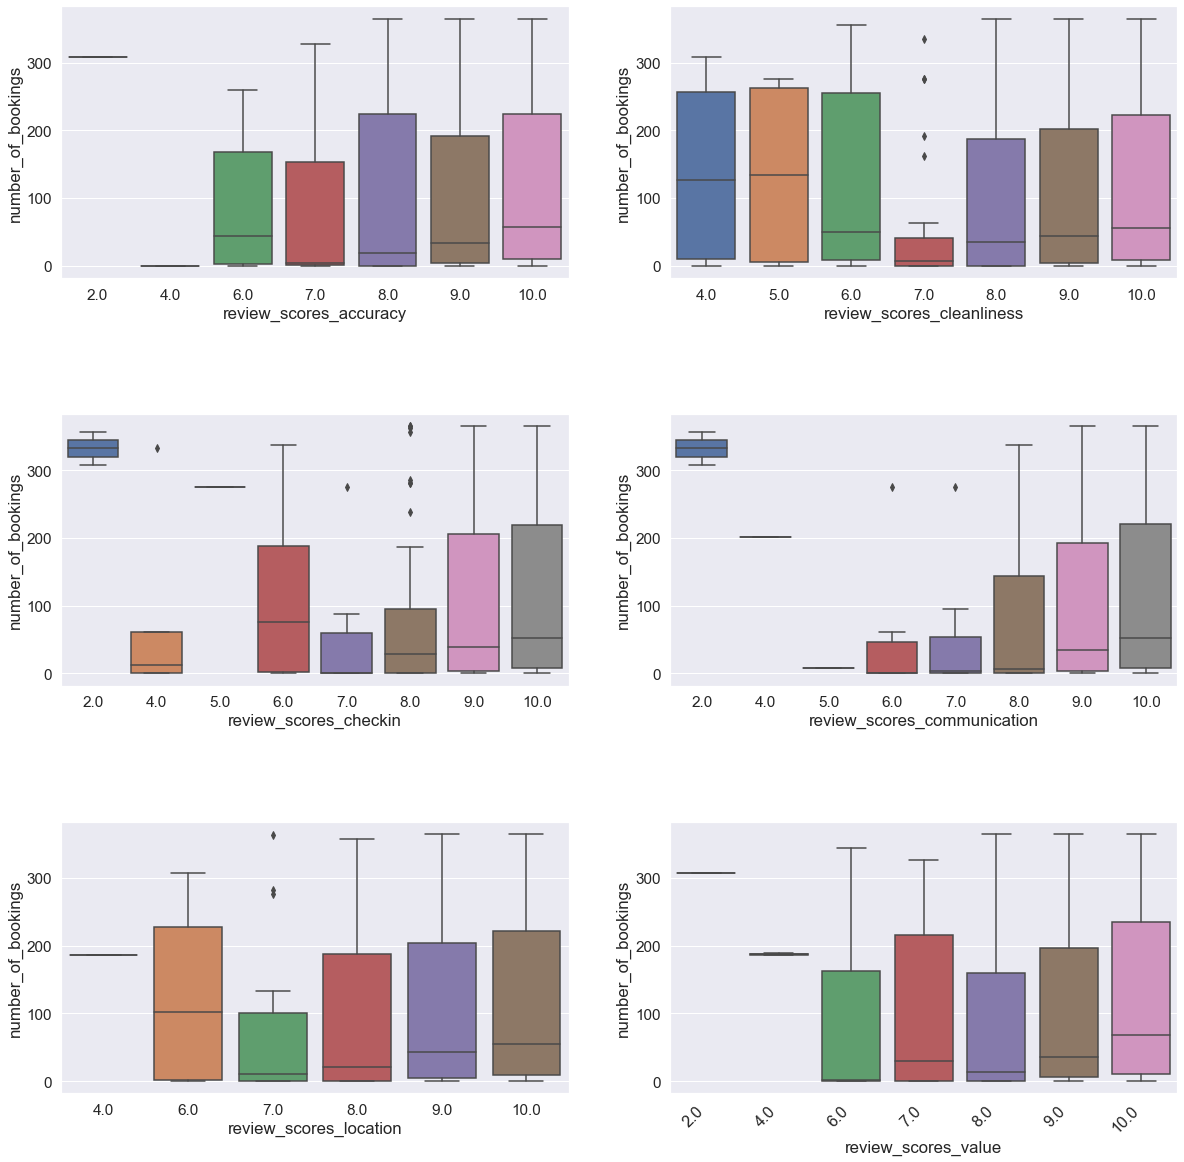

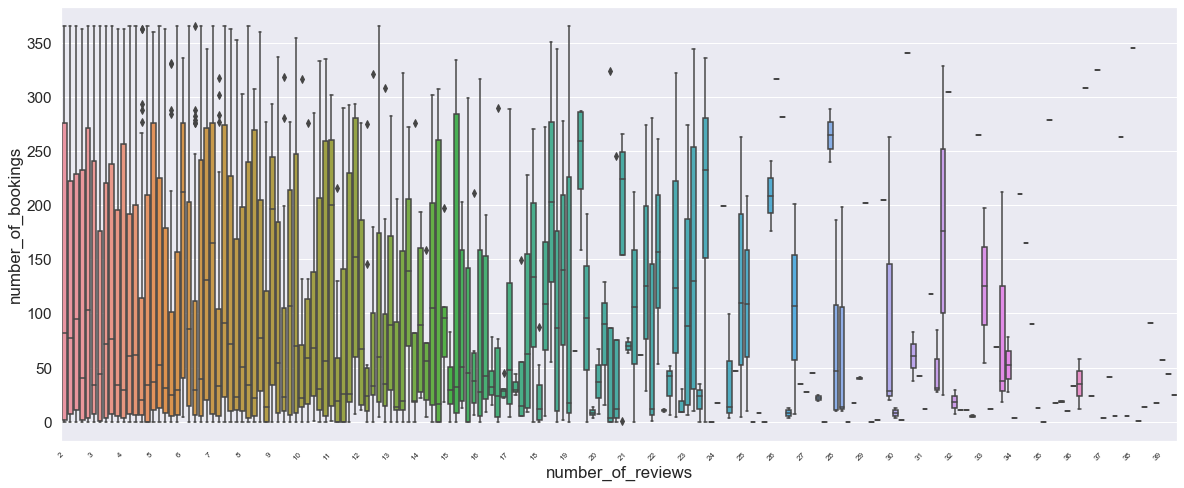

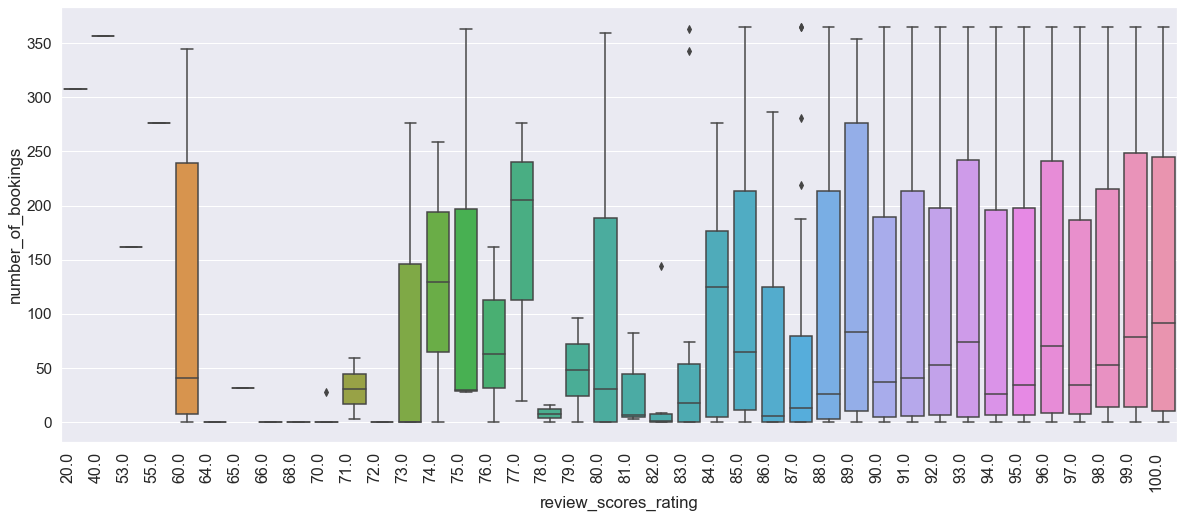

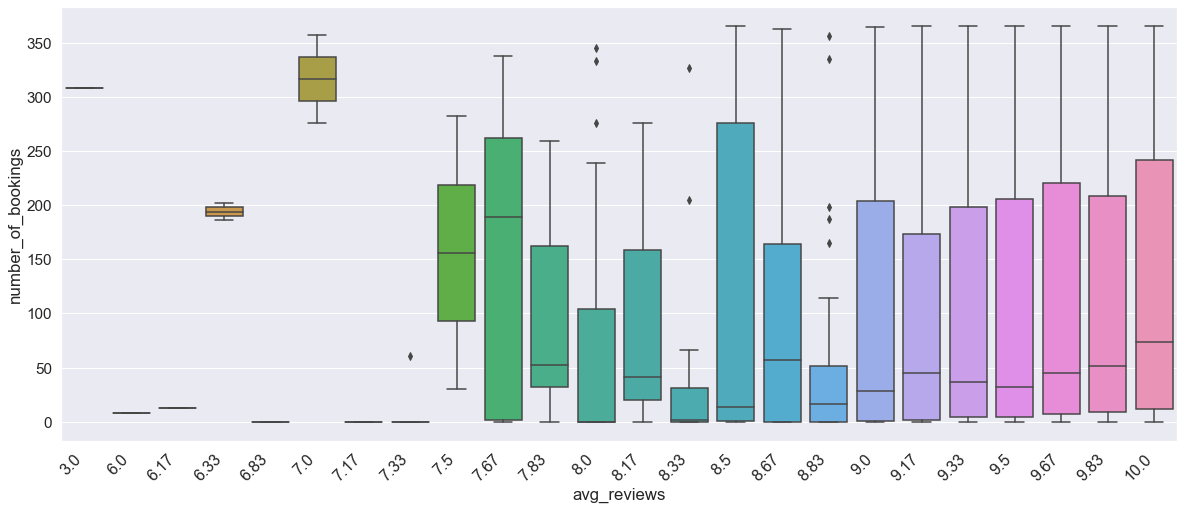

In [12]:
def feature_vs_reviews(dataset, reference_c):
    
    '''
    INPUT
        dataset: The dataset with the data to be plot
        
    OUTPUT
        Boxplots showing the relation betwenn the host characteristincs, and a property booking rate.
    '''
    selected_col = ['review_scores_accuracy', 
                    'review_scores_cleanliness',  
                    'review_scores_checkin',           
                    'review_scores_communication',   
                    'review_scores_location', 
                    'review_scores_value']

    fig, axs = plt.subplots(3, 2, figsize=(20, 20))
    fig.subplots_adjust(hspace =0.5 , wspace=.2)
    axs = axs.ravel()

    for i in range(6):
        sns.boxplot(data=dataset, x=selected_col[i], y=reference_c, ax=axs[i])
        axs[i] = plt.gca()
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right', fontsize=16);
    plt.savefig('Property-room_occupation_review_general.png', bbox_inches='tight');
#----------------------------------------------------------------------#
    plt.figure(figsize=(20,8))
    
    sns.boxplot(data=dataset, x='number_of_reviews', y=reference_c)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    plt.savefig('Property-room_occupation_number_of_reviews.png', bbox_inches='tight');
    
#----------------------------------------------------------------------#
    plt.figure(figsize=(20,8))
    
    sns.boxplot(data=dataset, x='review_scores_rating', y=reference_c)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=16)
    plt.savefig('Property-room_occupation_review_scores_rating.png', bbox_inches='tight');
    
#----------------------------------------------------------------------#
    plt.figure(figsize=(20,8))
    
    sns.boxplot(data=dataset, x='avg_reviews', y=reference_c)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16) 
    plt.savefig('Property-room_occupation_avg_reviews.png', bbox_inches='tight');
    

    
feature_vs_reviews(seattle_listings, 'number_of_bookings')

As expected, places with higher reviews also have higher bookings. The peak is around 8.5, likely because a listing with reviews higher that this value are more rare to find.

## Key takeaways

To increase the booking rate:
1. Reduce cleaning fees and security deposits.
2. Improve your communication skills